In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [255]:
term_train=pd.read_csv(r"C:\Users\chaud\Downloads\termdeposit_train.csv")
term_test=pd.read_csv(r"C:\Users\chaud\Downloads\termdeposit_test.csv")

In [256]:
term_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [257]:
term_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [258]:
term_train.shape

(31647, 18)

In [259]:
term_test.shape

(13564, 17)

In [260]:
term_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [261]:
term_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [188]:
term_train.describe().T.style.background_gradient(cmap = "copper_r")

,count,mean,std,min,25%,50%,75%,max
ID,31647.000000,22563.972162,13075.936990,2.000000,11218.000000,22519.000000,33879.500000,45211.000000
age,31647.000000,40.957247,10.625134,18.000000,33.000000,39.000000,48.000000,95.000000
balance,31647.000000,1363.890258,3028.304293,-8019.000000,73.000000,450.000000,1431.000000,102127.000000
day,31647.000000,15.835466,8.337097,1.000000,8.000000,16.000000,21.000000,31.000000
duration,31647.000000,258.113534,257.118973,0.000000,104.000000,180.000000,318.500000,4918.000000
campaign,31647.000000,2.765697,3.113830,1.000000,1.000000,2.000000,3.000000,63.000000
pdays,31647.000000,39.576042,99.317592,-1.000000,-1.000000,-1.000000,-1.000000,871.000000
previous,31647.000000,0.574272,2.422529,0.000000,0.000000,0.000000,0.000000,275.000000


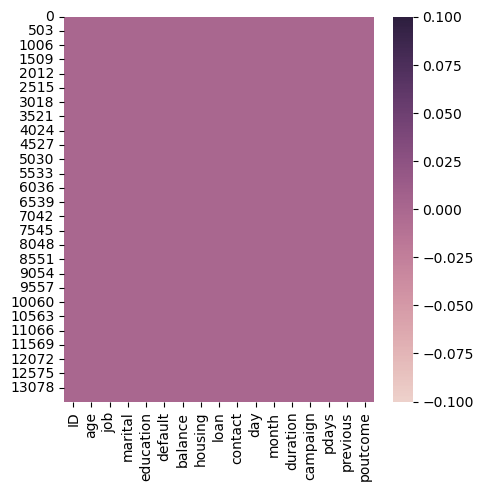

In [189]:
plt.figure(figsize = (5,5))
sns.heatmap(term_test.isnull(), cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [190]:
term_train.duplicated().sum()


0

In [191]:
for col in term_train:
    print(f"{col}: {term_train[col].nunique()}")

ID: 31647
age: 76
job: 12
marital: 3
education: 4
default: 2
balance: 6326
housing: 2
loan: 2
contact: 3
day: 31
month: 12
duration: 1454
campaign: 45
pdays: 509
previous: 38
poutcome: 4
subscribed: 2


In [192]:
term_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

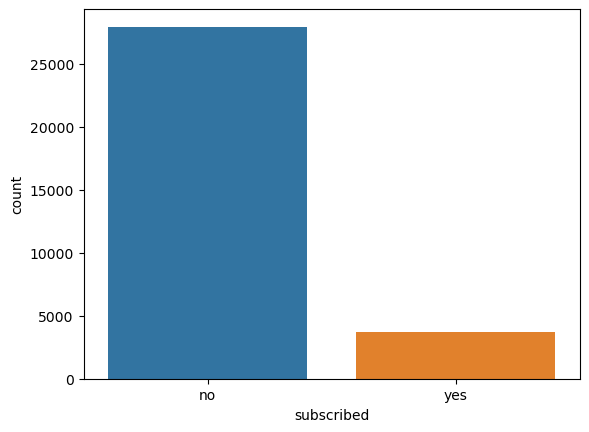

In [193]:
sns.countplot(data=term_train, x='subscribed' )

In [194]:
def bar_plot(a , b ,col):

    fig=plt.figure(figsize=(12,10))

    for i in range(1, ((a*b)+1)):
        fig.add_subplot(b, a, i)
        sns.countplot(data =term_train, x=term_train[col[i-1]])  
        plt.xlabel (col[i-1] , fontsize = 20)
        
    plt.show()

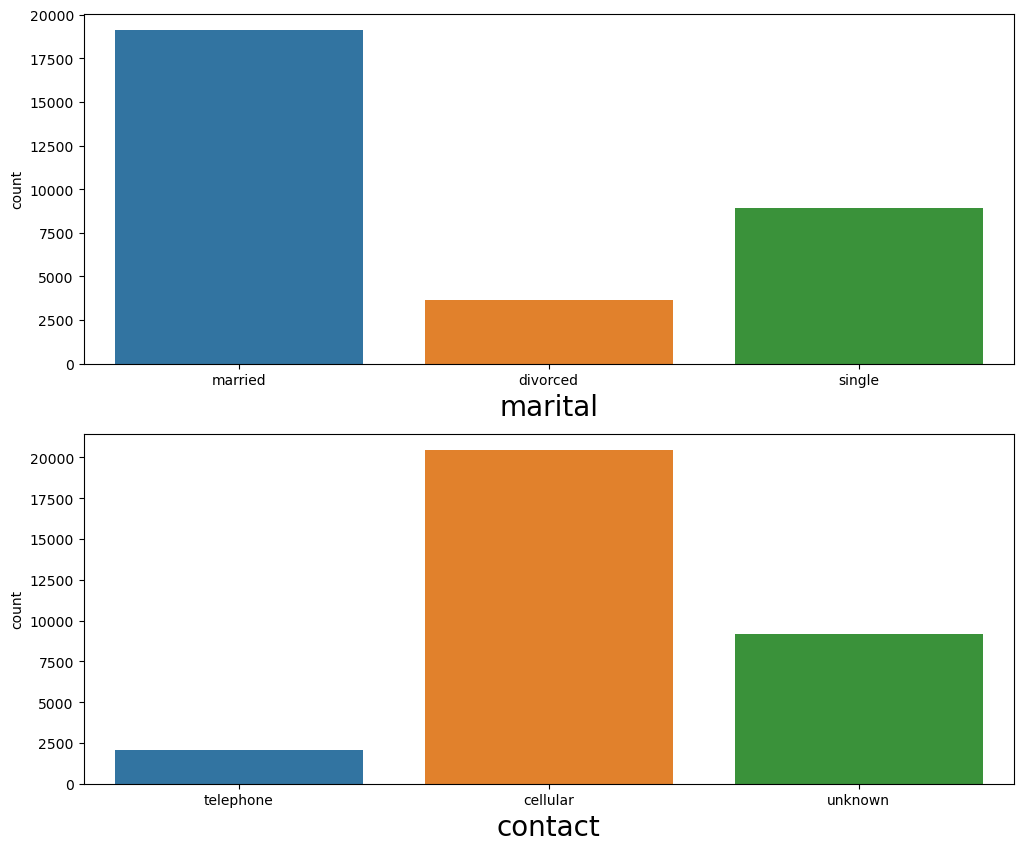

In [195]:
col = ["marital","contact"]
bar_plot(1,2,col)

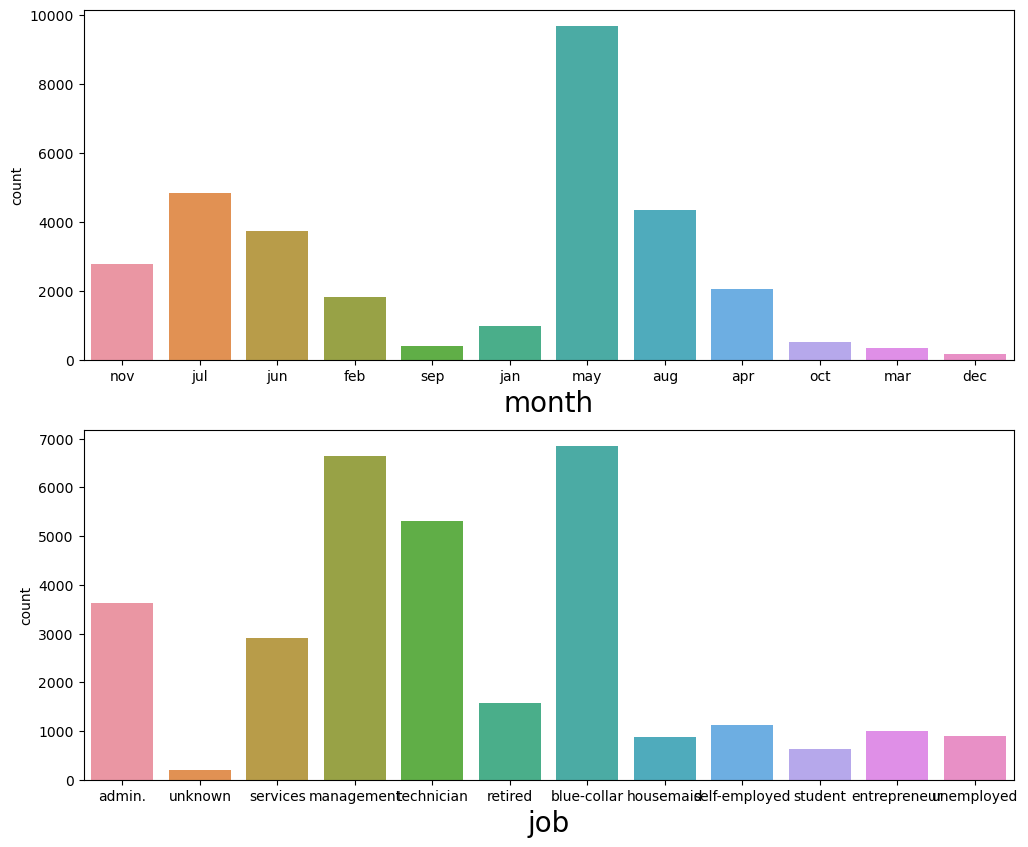

In [196]:
col= ["month","job"]
bar_plot(1,2,col)

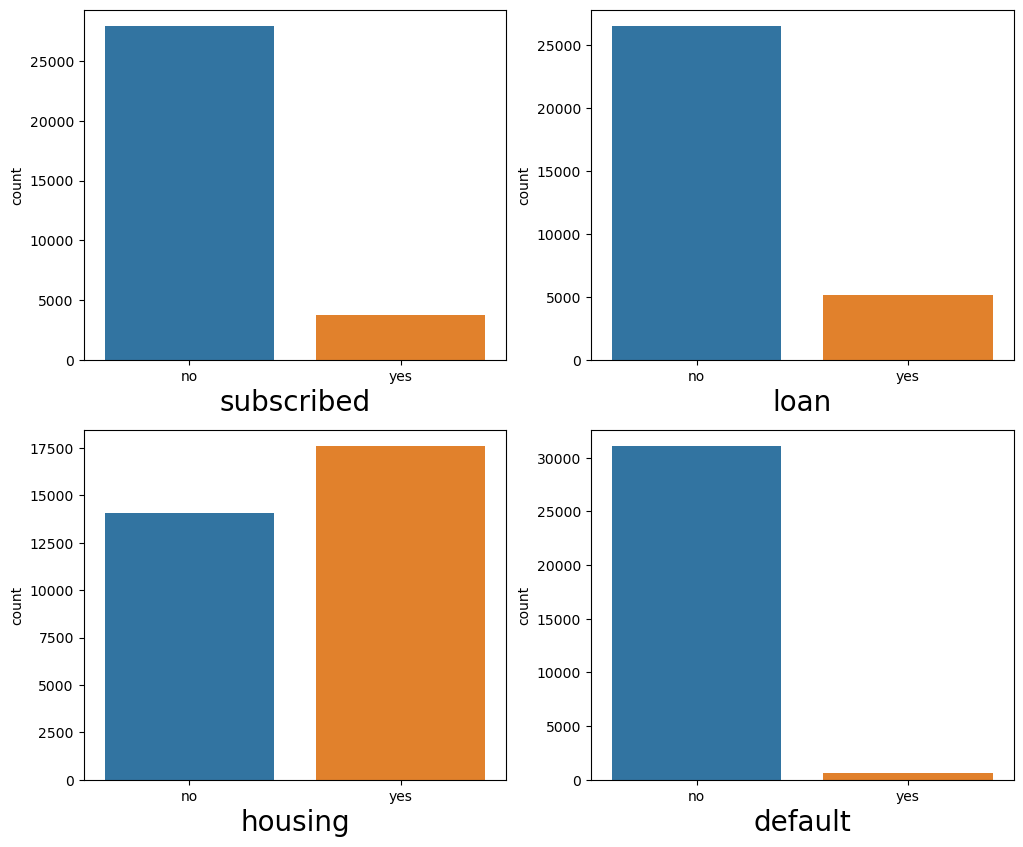

In [197]:
col= ["subscribed","loan","housing","default"]
bar_plot(2,2,col)

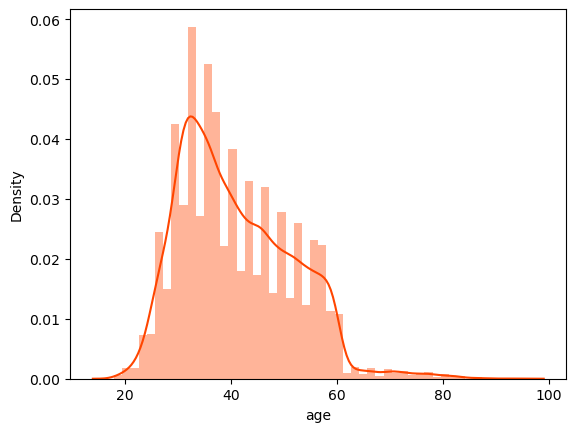

In [198]:
sns.distplot(term_train["age"] , color="#FF4500")
plt.show()

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


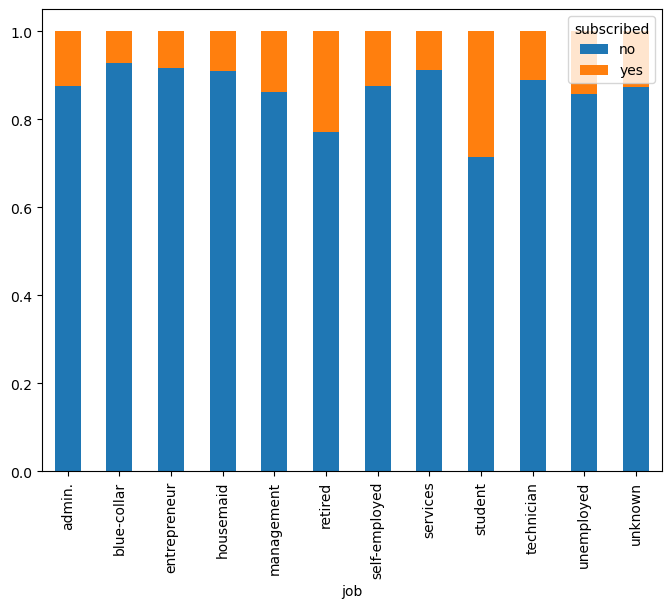

In [199]:
print(pd.crosstab(term_train['job'],term_train['subscribed']))

job = pd.crosstab(term_train['job'],term_train['subscribed'])
job_n = job.div(job.sum(1).astype(float), axis=0)
job_n.plot.bar(stacked=True,figsize=(8,6));

In [200]:
marital_sub =pd.pivot_table(term_train, index=['marital'],columns=['subscribed'], aggfunc={'subscribed':'count'})
marital_sub

subscribed      
subscribed         no   yes
marital                    
divorced         3185   445
married         17176  1919
single           7571  1351

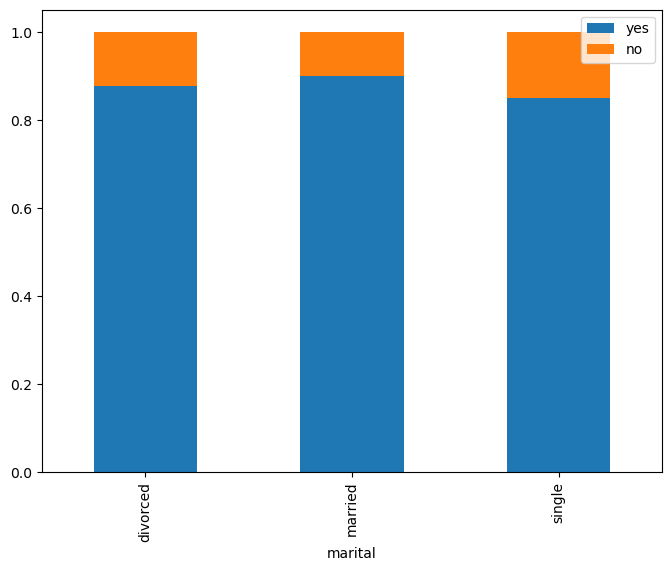

In [201]:
mar= marital_sub.div(marital_sub.sum(1).astype(float), axis=0)
mar.plot.bar(stacked=True,figsize=(8,6))
plt.legend(('yes', 'no'))

In [268]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','subscribed']
for col in categorical_columns:
    term_train[col] = label_encoder.fit_transform(term_train[col])


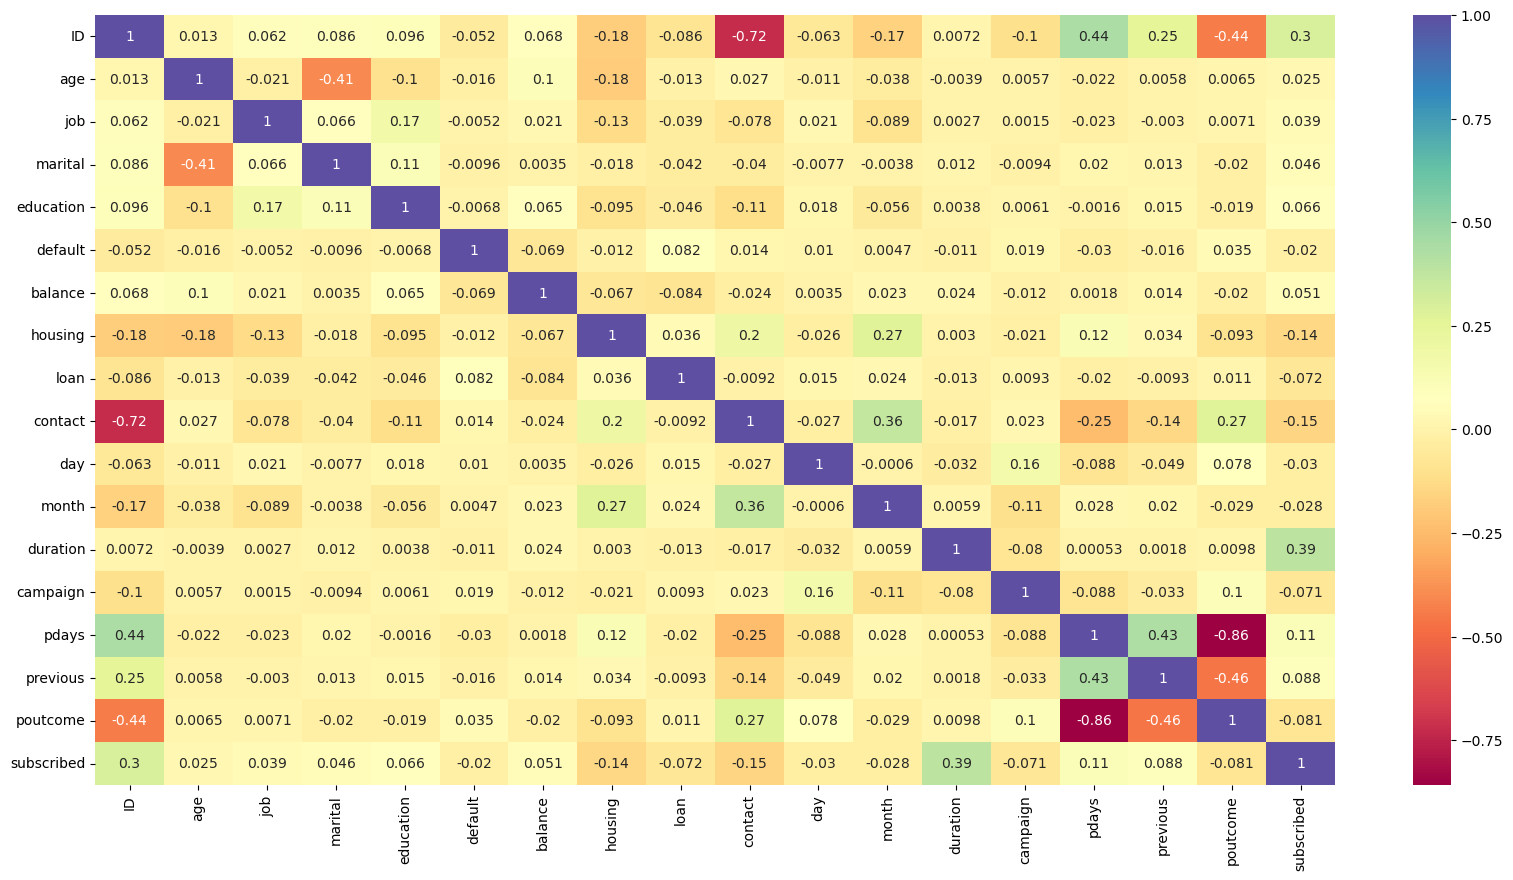

In [269]:
plt.figure(figsize =(20,10))
sns.heatmap(term_train.corr(), annot= True ,cmap='Spectral')
plt.show()

Comment- We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

In [270]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [271]:
X = term_train.drop('subscribed', axis=1)
Y = term_train['subscribed']

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

In [274]:
log_reg = LogisticRegression()


In [275]:
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [276]:
pred = log_reg.predict(X_test)

In [277]:
score= accuracy_score(pred,Y_test)

In [278]:
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', score)

Accuracy Score of Logistics Regression : 0.8873617693522907


In [279]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [280]:
pred_dtc = dtc.predict(X_test)

In [281]:
score= accuracy_score(pred_dtc,Y_test)

In [282]:
print('\033[1m'+'Accuracy Score of decision tree classifier :'+'\033[0m', score)

Accuracy Score of decision tree classifier : 0.8903633491311217


In [283]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,Y_train)

KNeighborsClassifier()

In [284]:
predknn = KNN.predict(X_test)
predknn

array([0, 0, 0, ..., 1, 0, 0])

In [285]:
score= accuracy_score(predknn,Y_test)

In [286]:
print('\033[1m'+'Accuracy Score of knn :'+'\033[0m', score)

Accuracy Score of knn : 0.890521327014218


In [287]:
rf_classifier = RandomForestClassifier()

In [288]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [289]:
pred_rf = rf_classifier.predict(X_test)

In [290]:
score= accuracy_score(pred_rf,Y_test)

In [301]:
print('\033[1m'+'Accuracy Score of rf :'+'\033[0m', score)

Accuracy Score of rf : 0.9078988941548183


In [302]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_columns:
    term_test[col] = label_encoder.fit_transform(term_test[col])


In [293]:
term_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3


In [294]:
test_pred = rf_classifier.predict(term_test)
test_pred

array([0, 0, 0, ..., 0, 1, 0])

In [295]:
term_test['ID'] = term_test['ID']
term_test['subscribed'] = test_pred

In [296]:
term_test['subscribed']

0        0
1        0
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int32

In [297]:
term_test['subscribed'].replace(0,'no',inplace=True)
term_test['subscribed'].replace(1,'yes',inplace=True)

In [299]:
term_test['subscribed']

0         no
1         no
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [300]:
term_test.to_csv('submission file.csv', header=True, index=False)